In this noteook, we will go through the steps to load the ResNet152 model, pre-process the images to the required format and call the model to find the top predictions.

In [1]:
from resnet152 import ResNet152
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import wget

Using TensorFlow backend.


We first load the model which we imported from the resnet152 module. This can take about 30s.

In [2]:
%%time
model = ResNet152(weights='imagenet')

CPU times: user 28.2 s, sys: 866 ms, total: 29.1 s
Wall time: 28.5 s


Here is the summary of the model.

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2 (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9408        conv1_zeropadding[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
scale_conv

__________________________________________________________________________________________________
res4b35_branch2c (Conv2D)       (None, 14, 14, 1024) 262144      res4b35_branch2b_relu[0][0]      
__________________________________________________________________________________________________
bn4b35_branch2c (BatchNormaliza (None, 14, 14, 1024) 4096        res4b35_branch2c[0][0]           
__________________________________________________________________________________________________
scale4b35_branch2c (Scale)      (None, 14, 14, 1024) 2048        bn4b35_branch2c[0][0]            
__________________________________________________________________________________________________
res4b35 (Add)                   (None, 14, 14, 1024) 0           scale4b35_branch2c[0][0]         
                                                                 res4b34_relu[0][0]               
__________________________________________________________________________________________________
res4b35_re

Let's test our model with an image of a Lynx.

In [4]:
wget.download('https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Lynx_lynx_poing.jpg/220px-Lynx_lynx_poing.jpg')

'220px-Lynx_lynx_poing.jpg'

(220, 330)


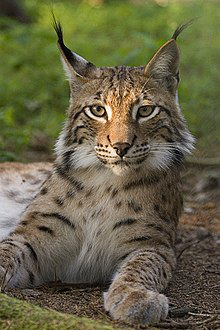

In [5]:
img_path = '220px-Lynx_lynx_poing.jpg'
print(Image.open(img_path).size)
Image.open(img_path)

Below, we load the image by resizing to (224, 224) and then preprocessing using the methods from keras preprocessing and imagenet utilities.

In [6]:
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

Now, let's call the model on our image to predict the top 3 labels. This will take a few seconds.

In [7]:
%%time
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=3))

Predicted: [[('n02127052', 'lynx', 0.99590886), ('n02128385', 'leopard', 0.0011504461), ('n02123159', 'tiger_cat', 0.0009417962)]]
CPU times: user 5 s, sys: 120 ms, total: 5.12 s
Wall time: 3.17 s


The top guess is Lynx with probability about 99%. We can now move on to [developing the model api for our model](01_DevelopModelDriver.ipynb).